# Python Data Science Handbook
## By Jake VenderPlas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import parser
from pandas_datareader import data

### Data representation in scikit-learn

In [2]:
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

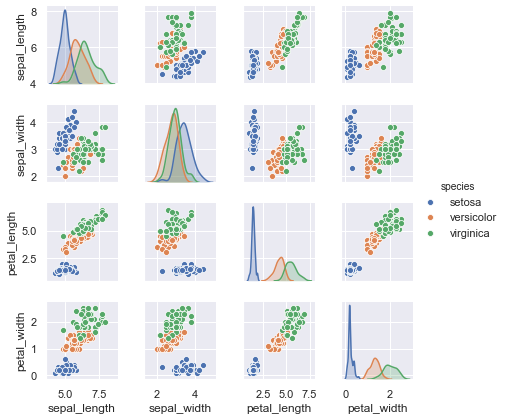

In [3]:
sns.pairplot(iris, hue='species', height=1.5)

In [4]:
X_iris= iris.drop('species', axis=1) # this is my input data
X_iris.shape

(150, 4)

In [5]:
y_iris= iris['species'] # this is my target data
y_iris.shape

(150,)

### supervised learning example: Simple linear regression

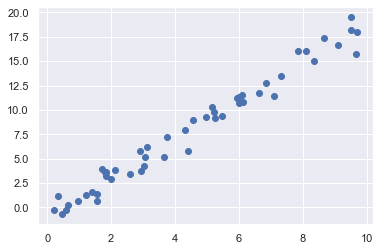

In [6]:
rng= np.random.RandomState(42)
x=10*rng.rand(50)
y=2*x -1 +rng.randn(50)
plt.scatter(x,y)

In [7]:
from sklearn.linear_model import LinearRegression
model= LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
X=x[:, np.newaxis]
X.shape

(50, 1)

In [9]:
# fit the model into your data
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
model.coef_

array([1.9776566])

In [11]:
model.intercept_

-0.903310725531111

In [12]:
# predict lebels for unknown data
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)


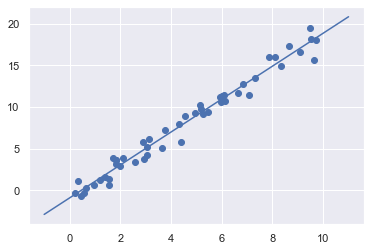

In [13]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

### Superviser learning example: Iris classification

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state= 1)

In [15]:
from sklearn.naive_bayes import GaussianNB # choose your model
model = GaussianNB() # instance of the model
model.fit(Xtrain, ytrain) # fit the model into the data
y_model = model.predict(Xtest) # predict on new data
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model) # Get the model predicted accuracy

0.9736842105263158

## Unsupervised learning example: Iris dimensionality

In [16]:
from sklearn.decomposition import PCA # Choose the model class
model = PCA(n_components=2)           # instance of the model with hyperparameter
model.fit(X_iris)                     # fit the data, no need to y 
X_2D = model.transform(X_iris)        # transform the data into two dimension

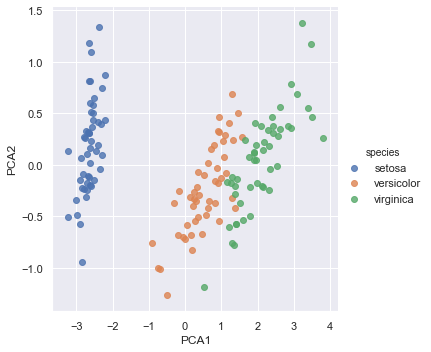

In [17]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot("PCA1", "PCA2", hue = 'species', data= iris, fit_reg= False)

### Unsupervised learning: Iris clustering

In [18]:
from sklearn import mixture # Gaussian mixture model
model = mixture.GaussianMixture(n_components=3, covariance_type='full') # instant the model with hyperparameters
model.fit(X_iris)   # fit the data, y is not specified
y_gmm = model.predict(X_iris)  # determine cluster labels.

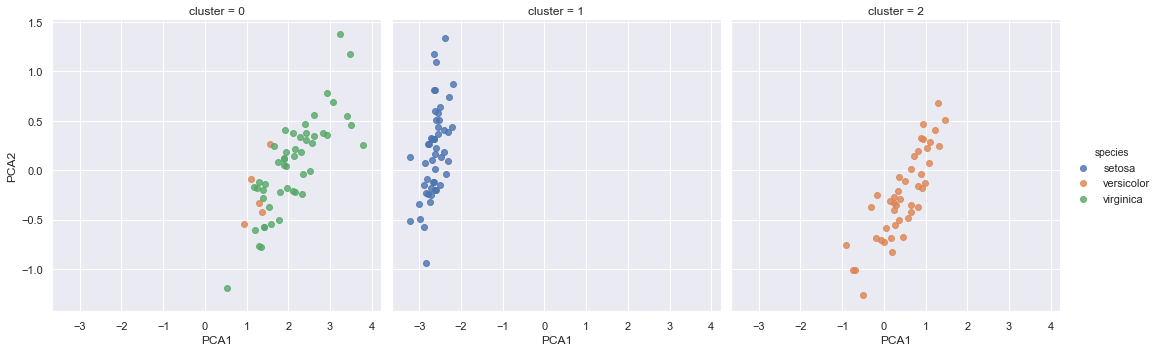

In [19]:
iris['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', data= iris, hue= 'species', col='cluster', fit_reg=False)

## Application: Exploring Handwritten Digits

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

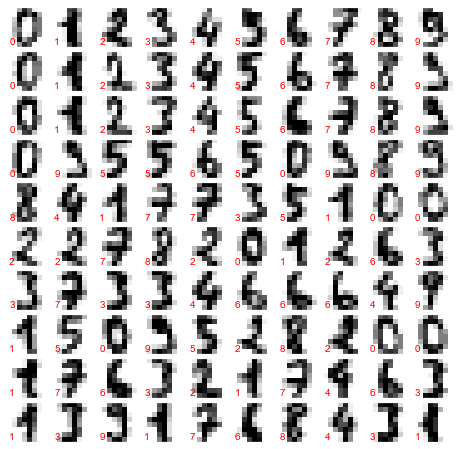

In [21]:
fig, axes = plt.subplots(10, 10, figsize= (8,8), 
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw = dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
          transform = ax.transAxes, color= 'red')

In [22]:
X= digits.data
X.shape

(1797, 64)

In [23]:
y= digits.target
y.shape

(1797,)

In [24]:
# here we will use of a mainfold learning algorithm called isomap and transform the data into twor dimensions
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected= iso.transform(digits.data)
data_projected.shape

(1797, 2)

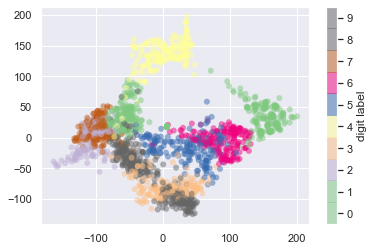

In [25]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

### classification on digits

In [26]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)

In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict( Xtest)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(77.10000000000001, 0.5, 'true value')

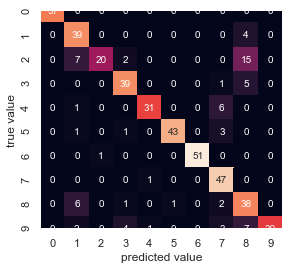

In [29]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar= False)
plt.xlabel("predicted value")
plt.ylabel("true value")

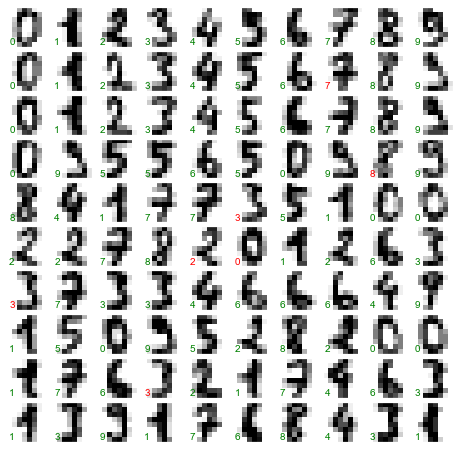

In [30]:
fig, axes = plt.subplots(10, 10, figsize= (8,8), 
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw = dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
          transform = ax.transAxes, color= 'green' if (ytest[i]) else 'red')

# Hyperparameter and model validation

In [31]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target

In [32]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=1)
model.fit(X,y)
y_model= model.predict(X)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

#### Model validation the right way: Holdout sets

In [34]:
X1, X2, y1, y2 = train_test_split(X, y, random_state= 0, train_size= 0.5)
model.fit(X1, y1)
y2_model= model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

#### Model validation via cross-validation

In [35]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [37]:
from sklearn.model_selection import LeaveOneOut
scores =cross_val_score(model, X, y, cv= LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [38]:
scores.mean()

0.96

### Selecting the best model

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression( degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                        LinearRegression(**kwargs))

In [40]:
def make_data(N, err = 1.0, rseed= 1): 
    rag= np.random.RandomState(rseed)
    X= rng.rand(N, 1) **2 
    y = 10 - 1. /(X.ravel() + 0.1)
    if ( err > 0):
        y+= err * rng.randn(N)
    return X, y
X,y = make_data(40)

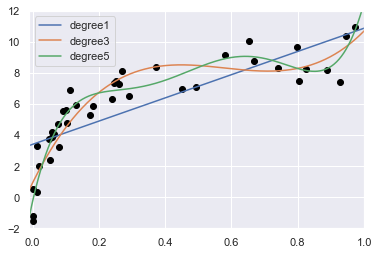

In [41]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color= 'black')
axis = plt.axis()
for degree in [1, 3, 5]: 
    y_test =  PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label = 'degree{0}'.format(degree))
    
plt.xlim(-.01, 1.0)
plt.ylim(-2, 12)
plt.legend(loc= 'best')

Text(0, 0.5, 'score')

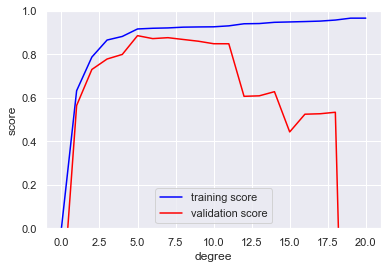

In [42]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 
                                          'polynomialfeatures__degree', degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color= 'blue', label= 'training score')
plt.plot(degree, np.median(val_score, 1), color= 'red', label= 'validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

(-0.05838122298392558,
 1.0299363727912818,
 -2.184926248883563,
 11.571603028864828)

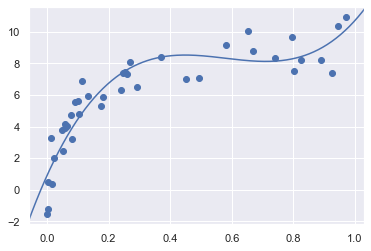

In [43]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test= PolynomialRegression(3).fit(X,y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

### Learning curve

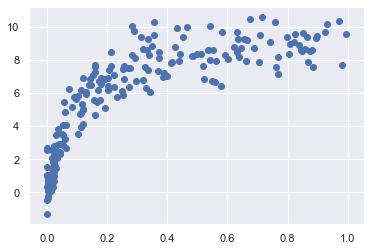

In [48]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel() , y2)

Text(0, 0.5, 'score')

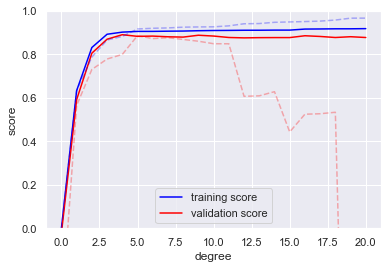

In [51]:
degree =  np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, 'polynomialfeatures__degree', degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue', label= 'training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label= 'validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha= 0.3,  linestyle= 'dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha= 0.3,  linestyle= 'dashed')
plt.legend(loc= 'lower center')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')

In [79]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6)) 
fig.subplots_adjust(left =0.0625, right =0.95, wspace = 0.1)


for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                        X,y, cv=7,
                                        train_sizes = np.linspace(0.3, 1, 25))
    
    ax[i].plot(N, np.mean(train_lc,1), color='blue', label = 'training score')
    ax[i].plot(N, np.mean(val_lc,1), color='red', label = 'validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle = 'dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree ={0}'.format(degree), size= 14)
    ax[i].legend(loc='best')

### Validation in practice grid search

In [93]:
from sklearn.model_selection import GridSearchCV

param_grid  = {'polynomialfeatures__degree': np.arange(21), 
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv = 7)





In [94]:
grid.fit(X, y)

C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'linearregression__fit_intercept': [True, False],
                        

In [95]:
grid.best_params_

{'linearregression__fit_intercept': True,
 'linearregression__normalize': False,
 'polynomialfeatures__degree': 5}

In [102]:
model =grid.best_estimator_
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

(-0.04985523732084313,
 1.0214103871281994,
 -2.1733210770134903,
 11.559997856994757)

## Feature Engineering

In [2]:
data = [{'price': 85000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
       {'price': 70000, 'rooms': 3, 'neighborhood': 'Fremont'},
       {'price': 65000, 'rooms': 3, 'neighborhood': 'Wallingford'},
       {'price': 60000, 'rooms': 2, 'neighborhood': 'Fremont'},]

In [3]:
# categorical features
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[    0,     1,     0, 85000,     4],
       [    1,     0,     0, 70000,     3],
       [    0,     0,     1, 65000,     3],
       [    1,     0,     0, 60000,     2]])

In [4]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [5]:
vec = DictVectorizer(sparse= False, dtype=int)
vec.fit_transform(data)

array([[    0,     1,     0, 85000,     4],
       [    1,     0,     0, 70000,     3],
       [    0,     0,     1, 65000,     3],
       [    1,     0,     0, 60000,     2]])

In [6]:
# Text feature
sample = ['problem of evil', 'evil queen', 'horizon problem']

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X  = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [8]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

evil  horizon  of  problem  queen
0     1        0   1        1      0
1     1        0   0        0      1
2     0        1   0        1      0

In [9]:
# TF-IDF (Term Frequency-Inverse Document Frequency)
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns= vec.get_feature_names())

evil   horizon        of   problem     queen
0  0.517856  0.000000  0.680919  0.517856  0.000000
1  0.605349  0.000000  0.000000  0.000000  0.795961
2  0.000000  0.795961  0.000000  0.605349  0.000000

#### Derived Features

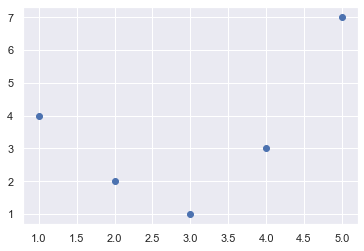

In [10]:
x=np.array([1, 2, 3, 4, 5])
y= np.array([4, 2, 1, 3, 7])
plt.scatter(x,y)

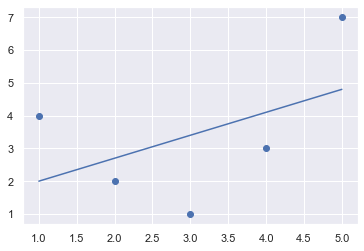

In [11]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit)

In [12]:
# Add polynomial feature into your data
from sklearn.preprocessing import PolynomialFeatures
ploy = PolynomialFeatures(degree=3, include_bias= False)
x2 = ploy.fit_transform(X)
print(x2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


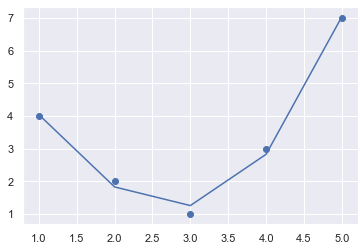

In [13]:
model = LinearRegression().fit(x2, y)
yfit = model.predict(x2)
plt.scatter(x, y)
plt.plot(x, yfit)

### Imputation of missing data

In [14]:
from numpy import nan
X = np.array([[nan, 0, 3],
             [3, 0, 3],
             [3, 0, 3],
             [4, nan, 3],
             [8, 0, 3]])
y= np.array([14, 16, -1, 8, -5])

In [15]:
from sklearn.preprocessing import Imputer
imp= Imputer(strategy= 'mean')
X2 = imp.fit_transform(X)
X2

C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[4.5, 0. , 3. ],
       [3. , 0. , 3. ],
       [3. , 0. , 3. ],
       [4. , 0. , 3. ],
       [8. , 0. , 3. ]])

In [16]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([ 6.4       , 10.28235294, 10.28235294,  7.69411765, -2.65882353])

### Feature pipeline

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
model = make_pipeline(SimpleImputer(strategy = 'mean'), PolynomialFeatures(degree =2), LinearRegression())

In [21]:
model.fit(X,y)
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[11.73364748  7.10338831  7.10338831 10.97458768 -4.91501178]


# In Depth: Naive Bayes Classification

In [ ]:
"""Naive bayes models are a group of extremely fast and simple classification algorithms that are often suitable for 
very high dimensional datasets.
"""

## Gaussian Naive Bayes

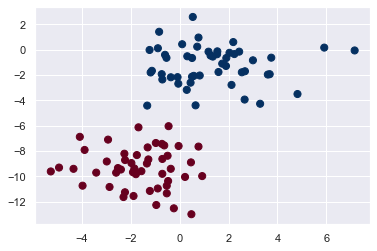

In [27]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

In [28]:
from sklearn.naive_bayes import GaussianNB
model =  GaussianNB()
model.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
rng= np.random.RandomState(0)
Xnew = [-6,-14]+[14, 18]*rng.rand(2000, 2)
ynew = model.predict(Xnew)

(-5.902170524311957, 7.789182875858786, -13.793829460308247, 3.381339464828492)

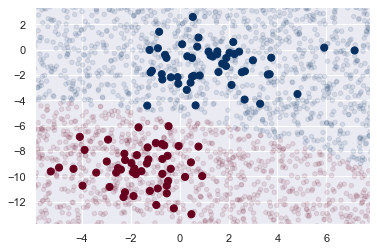

In [41]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s= 20, cmap='RdBu', alpha= 0.1)
plt.axis(lim)

In [45]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

## Multinomial Naive Bayes

In [50]:
# Here its assume that the feature are generated from simple multinomial distribution
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [52]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories =categories)
test = fetch_20newsgroups(subset='test', categories= categories)

In [54]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [56]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(30.453124999999993, 0.5, 'predicted label')

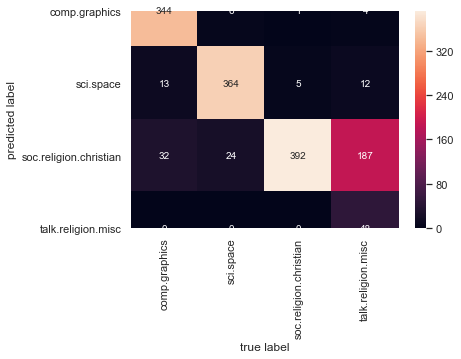

In [62]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar='True',
           xticklabels=train.target_names, yticklabels= train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [65]:
def predicted_category(s, train =train, model = model):
    pred =model.predict([s])
    return train.target_names[pred[0]]


In [66]:
predicted_category('sending a payload to the ISS')

'sci.space'

In [68]:
predicted_category('discussing islam vs atheism')

'soc.religion.christian'

In [69]:
predicted_category('determining the screen resolution')

'comp.graphics'

# In Depth: Linear Regression

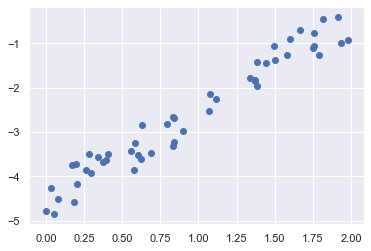

In [4]:
rng = np.random.RandomState(1)
x = 2*rng.rand(50)
y= 2 *x -5  + rng.rand(50)
plt.scatter(x, y)

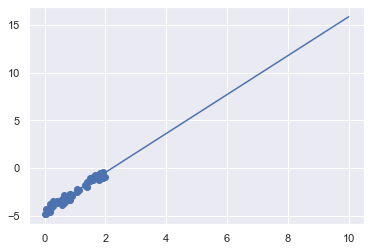

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [6]:
print('model slop:', model.coef_[0])
print('model intercept:', model.intercept_)

model slop: 2.041151216138753
model intercept: -4.533652972099129


In [7]:
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.49999999999999556
[ 1.5 -2.   1. ]


### Basic funciton regression

In [8]:
from sklearn.preprocessing import PolynomialFeatures
x= np.array([2,3,4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, np.newaxis])


array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [12]:
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

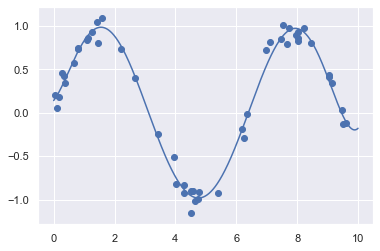

In [13]:
x =10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)

### Gaussian basic function

(0, 10)

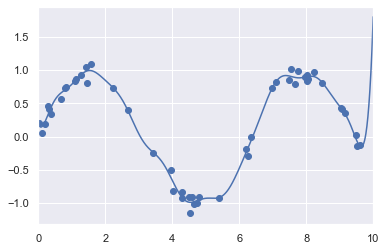

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, N, width_factor = 2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basic(x, y, width, axis = None):
        arg = (x-y)/width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basic(X[:,:, np.newaxis], self.centers_, self.width, axis = 1)
    
gauss_model = make_pipeline( GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:,np.newaxis], y)
yfit  =gauss_model.predict(xfit[:, np.newaxis])


plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)

## Regularization

(-1.5, 1.5)

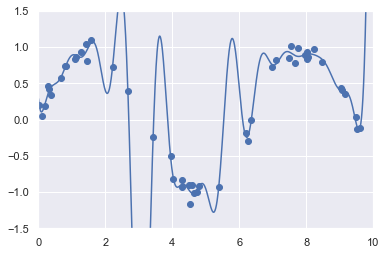

In [15]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
model.fit(x[:, np.newaxis], y)
plt.scatter(x,y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

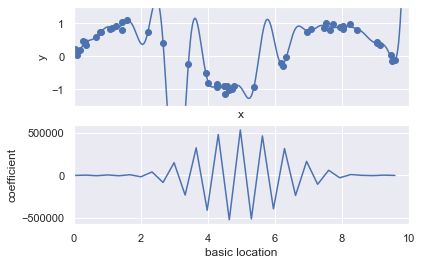

In [24]:
def basic_plot(model, title= None):
    fig, ax  = plt.subplots(2, sharex =True)
    model.fit(x[:,np.newaxis], y)
    ax[0].scatter(x,y)
    ax[0].plot(xfit, model.predict(xfit[:,np.newaxis]))
    ax[0].set(xlabel = 'x', ylabel = 'y', ylim= (-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)
    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basic location', ylabel = 'coefficient', xlim=(0,10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basic_plot(model)

### Ridge Regression (L2 regularization)

In [ ]:
"""
Parhaps the most common form of regularization is known as ridge regression or L2 regularization, sometimes also called
Tikhonov regularization. This proceeds by penalizing the sum of squares (2 -norms) of the model coefficients. 
"""

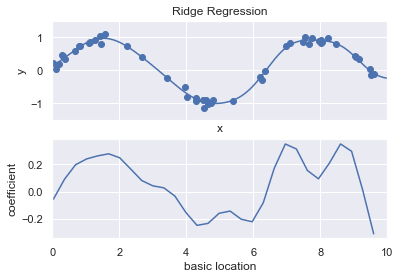

In [27]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha = 0.1))
basic_plot(model, title='Ridge Regression')

### Lasso regularization(L1)

In [ ]:
"""
Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1 norms)
of regression coeffient. 
"""

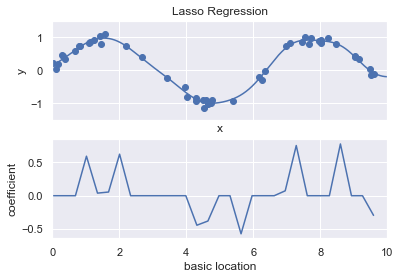

In [29]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha = 0.001))
basic_plot(model, title= "Lasso Regression")

### Example: Predict Bycycle Traffic

In [9]:
counts = pd.read_csv("data/FremontBridge.csv", index_col='Date', parse_dates=True)
weather = pd.read_csv('data/1404899.csv', index_col='DATE', parse_dates= True)

In [11]:
daily = counts.resample('d', how = 'sum')
daily['Total'] = daily.sum(axis = 1)
daily = daily[['Total']] # remove the others columns

C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


In [14]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(len(days)):
    daily[days[i]] = (daily.index.dayofweek ==i).astype(float)

In [15]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace= True)

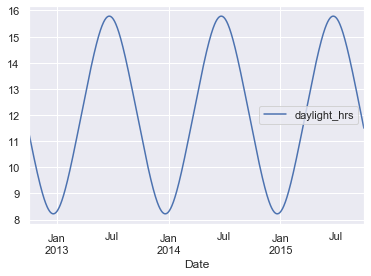

In [17]:
def hours_of_daylight(date, axis=23.44, latitude = 47.61): # comput the hours of daylight for the given date
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(days * 2* np.pi/ 365.25)))
    return 24. * np.degrees(np.arccos(1- np.clip(m, 0, 2))) / 180
daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()

In [20]:
# temperature are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp(C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# PRECIP IS IN 1/10 mm; convert it into inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily= daily.join(weather[['PRCP', 'Temp(C)', 'dry day']])

In [21]:
daily['annual'] = (daily.index - daily.index[0]).days / 365
daily.head()

Total  Mon  Tue  Wed  Thu  Fri  Sat  Sun  holiday  daylight_hrs  \
Date                                                                           
2012-10-03  3521.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0     11.277359   
2012-10-04  3475.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      0.0     11.219142   
2012-10-05  3148.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0      0.0     11.161038   
2012-10-06  2006.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0      0.0     11.103056   
2012-10-07  2142.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0      0.0     11.045208   

            PRCP  Temp(C)  dry day    annual  
Date                                          
2012-10-03   0.0     5.60        1  0.000000  
2012-10-04   0.0     5.65        1  0.002740  
2012-10-05   0.0     5.95        1  0.005479  
2012-10-06   0.0     6.05        1  0.008219  
2012-10-07   0.0     6.05        1  0.010959

In [25]:
from sklearn.linear_model import LinearRegression
column_names = ['Mon', 'Tue','Wed','Thu','Fri','Sat', 'Sun','holiday','daylight_hrs','PRCP','dry day', 'Temp(C)','annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X,y)
daily['predicted'] = model.predict(X)

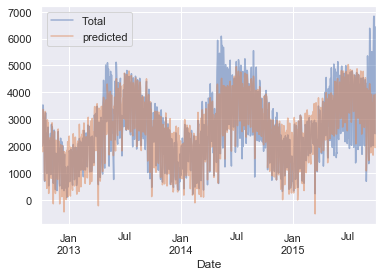

In [26]:
daily[['Total', 'predicted']].plot(alpha=0.5)

In [27]:
params = pd.Series(model.coef_, index= X.columns)
params

Mon               -692.512203
Tue               -562.247213
Wed               -570.263041
Thu               -714.602472
Fri              -1024.994412
Sat              -2321.684973
Sun              -2361.320199
holiday          -1202.169578
daylight_hrs       113.881835
PRCP           -177218.960535
dry day            563.405228
Temp(C)            386.984463
annual             104.814738
dtype: float64

In [30]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X,y)).coef_
             for i in range(1000)], 0)

In [31]:
print(pd.DataFrame({'effect': params.round(0), 
                   'error': err.round(0)}))

                effect    error
Mon             -693.0     89.0
Tue             -562.0     93.0
Wed             -570.0     90.0
Thu             -715.0     87.0
Fri            -1025.0     86.0
Sat            -2322.0     82.0
Sun            -2361.0     83.0
holiday        -1202.0    165.0
daylight_hrs     114.0     10.0
PRCP         -177219.0  16942.0
dry day          563.0     37.0
Temp(C)          387.0     21.0
annual           105.0     23.0


## In-Depth: Support Vector Machines

In [ ]:
"""
Support vector machines (SVMs) are particularly powerful and flexible class of supervised algorithms
for both classification and regression. 
"""

In [5]:
from scipy import stats

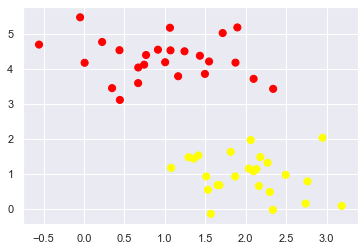

In [6]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s = 50, cmap='autumn')

(-1, 3.5)

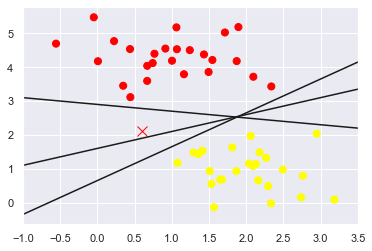

In [7]:
# linear discriminative classifier
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plt.plot([0.6],[2.1], 'x', color = 'red', markersize = 10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m*xfit +b, '-k')
plt.xlim(-1, 3.5)

### Supprt vector Machines: Maximizing the margin

(-1, 3.5)

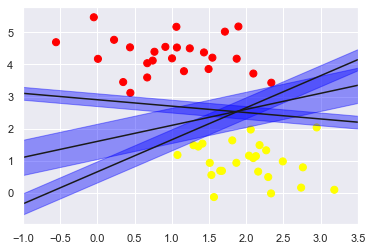

In [8]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit -d, yfit + d, edgecolor = 'none', color = 'blue', alpha= 0.4)
plt.xlim(-1, 3.5)

#### Fitting a support vector machine

In [9]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [10]:
def plot_svc_decision_function(model, ax=None, plot_support= True):
    "plot the decision function for a two-dimensional SVC"
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P= model.decision_function(xy).reshape(X.shape)

    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors = 'k',
              levels = [-1, 0, 1], alpha = 0.5,
              linestyles = ['--','-','--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], 
                  model.support_vectors_[:, 1],
                  s=300, linewidth =1, facecolors ='none')
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

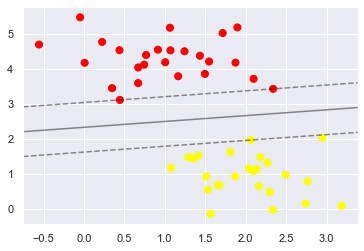

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap = 'autumn')
plot_svc_decision_function(model)

In [12]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

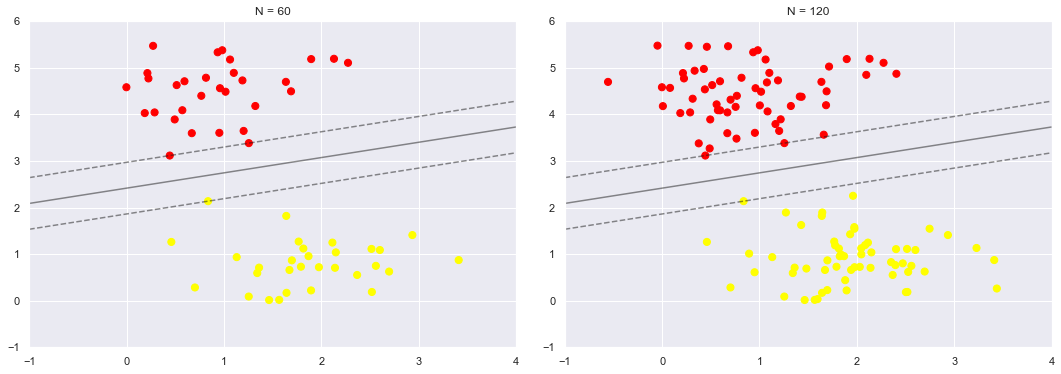

In [13]:

def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [14]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 100, 200, 1000], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 100, 200, 1000), value=10), Output()), _dom_class…

### Beyond linear boundaries: Kernel SVM

In [ ]:
"""
Where SVM become extremly powerful is when it is combined with kernels
"""

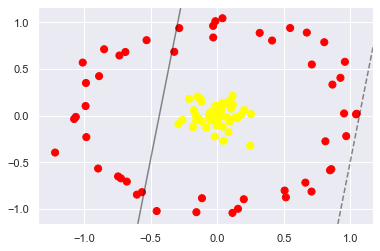

In [15]:
from sklearn.datasets.samples_generator import make_circles
X,y = make_circles(100,  factor=0.1, noise=0.1)
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

In [16]:
r = np.exp(-(X**2).sum(1))

In [21]:
from mpl_toolkits import mplot3d
def plot_3D(elev = 30, azim = 30, X=X, y=y):
    ax= plt.subplot(projection='3d')
    ax.scatter3D(X[:,0], X[:,1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
interact(plot_3D, elev = [-90, 90], azip=(-180, 180), X= fixed(X), y=fixed(y))


interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-1.47001917e-01,  2.03380454e-01],
       [ 9.25198035e-02,  1.54506746e-01],
       [ 4.11811264e-02, -1.18809531e-01],
       [-9.89103674e-01,  1.02562850e-01],
       [ 1.79594432e-03, -5.92759485e-02],
       [ 9.53393744e-01,  2.30541569e-02],
       [-2.10774184e-01,  1.78776495e-01],
       [-1.46920854e-02, -4.42387206e-02],
       [ 1.06875617e-02,  1.07215618e-01],
       [-8.87508374e-01,  4.22860037e-01],
       [-1.17337008e-01, -5.91515448e-02],
       [ 1.99706540e-01, -8.96183412e-01],
       [-5.65400308e-01, -8.20149940e-01],
       [-7.23424184e-01, -6.72398291e-01],
       [-1.62687655e-01,  8.78123417e-03],
       [-3.08006436e-02,  9.61795444e-01],
       [ 6.73270866e-01,  8.89851416e-01],
       [-2.85170396e-01,  9.37540651e-01],
       [-6.12659752e-02, -3.61795922e-03],
       [-6.03457570e-01, -8.46699757e-01],
       [ 2.47930628e-01, -3.22799958e-01],
       [-1.58522587e-01, -5.12979885e-02],
       

In [22]:
"""
In scikit learn, we can apply kernelized SVM simply by changing our linear kernel to an RBF (radial bias function) kernel,
using the kernel model hyperparameter
"""

'\nIn scikit learn, we can apply kernelized SVM simply by changing our linear kernel to an RBF (radial bias function) kernel,\n'

In [24]:
clf  = SVC(kernel='rbf', C=1E6, gamma='scale')
clf.fit(X,y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

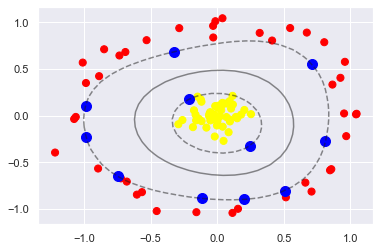

In [29]:
plt.scatter(X[:,0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, lw= 1, facecolors = 'blue')

### Tuning the SVM: softening margins

In [ ]:
"""
our discussion so far has centred on very clean datasts, in which ap perfect decision boundary exists.But what if your data
has some snount of overlap?
"""

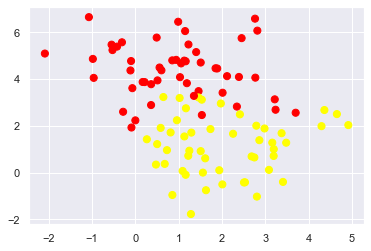

In [32]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std= 1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

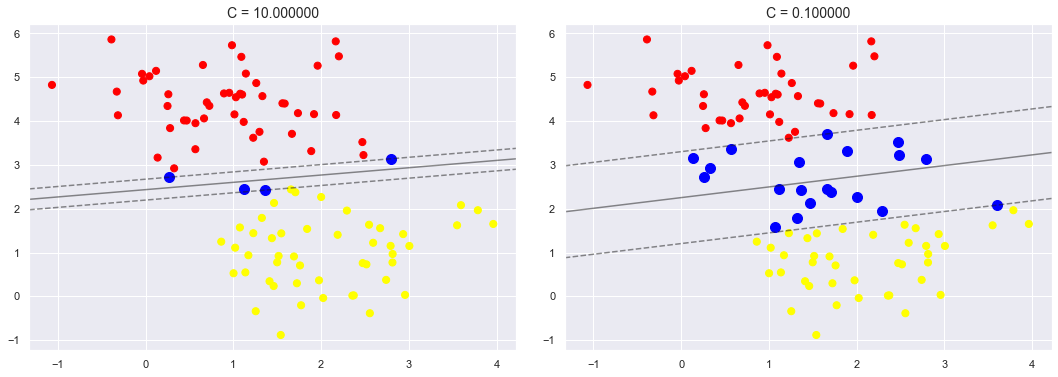

In [38]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)

for axi, C in zip(ax,  [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X,y)
    axi.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1], s= 100, lw=1, facecolor = 'blue')
    axi.set_title('C = {0:1f}'.format(C), size= 14)

## Example: Face Recognition

In [6]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


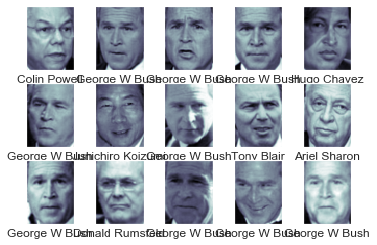

In [9]:
fig , ax  =  plt.subplots(3,5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'bone')
    axi.set(xticks = [], yticks = [],
           xlabel = faces.target_names[faces.target[i]])
    

In [12]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components =150, whiten =True, random_state= 42)
svc = SVC(kernel ='rbf', class_weight = 'balanced')
model = make_pipeline(pca, svc)

In [13]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state= 42)

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, cv=3)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)


Wall time: 51.8 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [22]:
model =grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'predicted names; incorrect lables in Red')

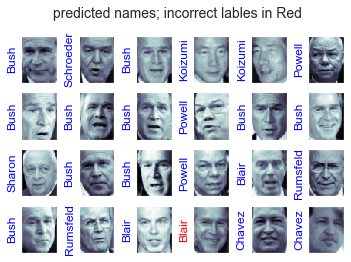

In [35]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap = 'bone')
    axi.set(xticks=[], yticks= [])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                  color = 'blue' if yfit[i]==ytest[i] else 'red')
fig.suptitle('predicted names; incorrect lables in Red', size=14)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



Text(73.64857142857144, 0.5, 'predict label')

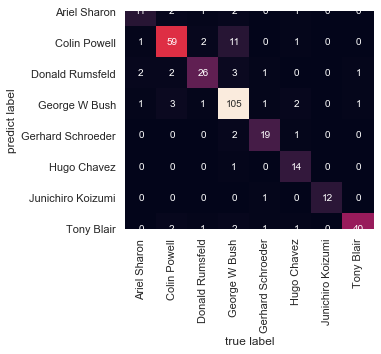

In [38]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square= True, annot= True, fmt = 'd', cbar = False, xticklabels = faces.target_names,
           yticklabels =faces.target_names)
plt.xlabel('true label')
plt.ylabel('predict label')

## In-Depth: Decision Trees and Random Forests

In [3]:
# Here we'll tak ea look at motivating another powerful algorithm -  a non-parametric algorithm called random forests

### Motivating Random Forests: Decision Trees

In [5]:
# Random forests are an example of an ensemble learner built on decision trees. 
# crating a decision tree

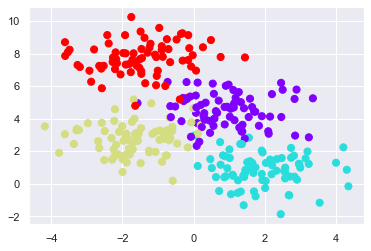

In [14]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier().fit(X,y)

In [23]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    #Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c =y, s =30, cmap=cmap, clim= (y.min(), y.max()), zorder= 3)
    ax.axis('tight')
    ax.axis('off')
    xlim= ax.get_xlim()
    ylim=ax.get_ylim()
    
    # fit the extimator
    model.fit(X,y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z=  model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # create a color plot with the results
    n_classes = len(np.unique(y))
    contures = ax.contourf(xx, yy, Z, alpha = 0.3, levels =np.arange(n_classes +1) - 0.5, 
                           cmap = cmap,  zorder = 1)
    ax.set(xlim=xlim, ylim= ylim)

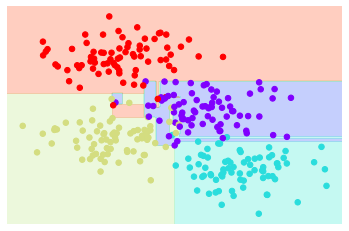

In [24]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [26]:
import helpers_05_08
helpers_05_08.plot_tree_interactive(X, y);

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

In [27]:
# Decisionn trees overfitting
helpers_05_08.randomized_tree_interactive(X,y)

interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…

## Ensembles of Estimators: Ramdom Forests

In [ ]:
"""
Bagging makes use of an ensemble of parallel extimators, each of which overfits the ata and verrages the results to
find  a better classification. An ensemble of randomized decision trees is known as a random forest
"""

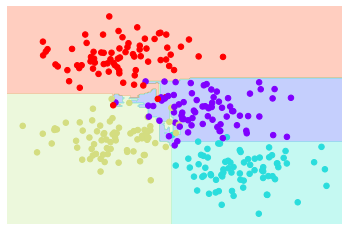

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(X,y)
visualize_classifier(bag, X, y)

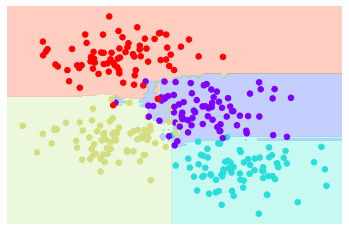

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)

## Random Forest Regression

In [ ]:
"""
Random forest can also be made to wok in the case of regression (that is, continuous rather than categorical variables)
"""

<ErrorbarContainer object of 3 artists>

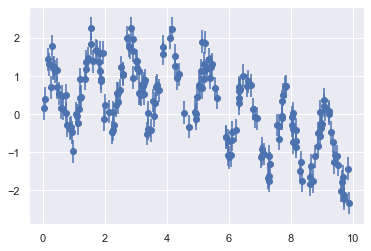

In [36]:
rng = np.random.RandomState(42)
x = 10*rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation =np.sin(5*x)
    slow_oscillation =np.sin(0.5*x)
    noise = sigma * rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

y= model(x)
plt.errorbar(x, y, 0.3, fmt = 'o')

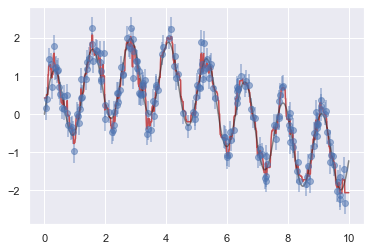

In [39]:
"""
using the random forest regressor, we can find the best-fit curve as follows
"""

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt = 'o', alpha= 0.5)
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha=0.5)

In [ ]:
"""
Here is the model shown by the smooth curve, while the random forest model is shown by the jagged curve
"""

## Example: Random Forest for Classifying Digits

In [41]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

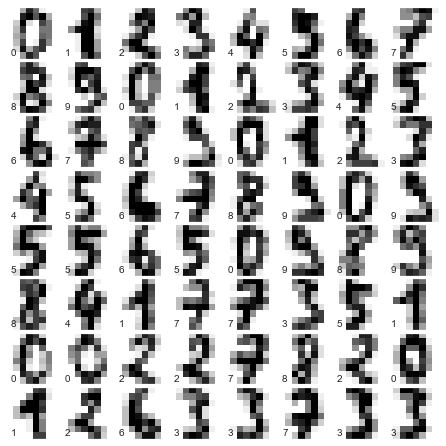

In [45]:
# set up the feature 
fig =  plt.figure(figsize=(6, 6))
fig.subplots_adjust(left = 0, right= 1, bottom = 0, top= 1, hspace = 0.05, wspace =0.05)

for i in range(64):
    ax  = fig.add_subplot(8, 8, i+1, xticks = [], yticks = [])
    ax.imshow(digits.images[i], cmap = plt.cm.binary, interpolation ='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [49]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state = 0 )

model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [50]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.96      0.98        45
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Text(56.74000000000005, 0.5, 'predicted label')

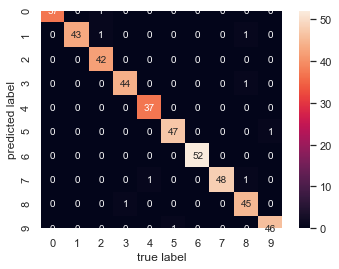

In [51]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot= True, fmt = 'd', cbar = True)
plt.xlabel('true label')
plt.ylabel('predicted label')

## In-Depeth: Principal Component Analysis

In [ ]:
"""
PCA is foundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization for
noise filtering, for feature extractio and engineering, and much more. 
"""

### Introducing Principal Component Analysis

In [ ]:
""" Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data"""

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593763,
 1.0195904306706842)

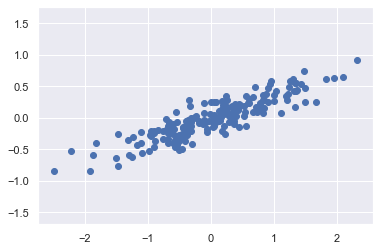

In [4]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [7]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593763,
 1.0195904306706842)

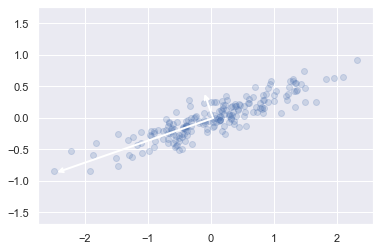

In [12]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict( arrowstyle = '->', linewidth = 2, shrinkA = 0, shrinkB = 0)
    ax.annotate("", v1, v0, arrowprops = arrowprops)

# draw data    
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

In [ ]:
"""
This transformation from data axes to principal axes is as an affine transformation, which basically means it is composend 
of a tranlation, rotation, and uniform scalling
"""

### PCA as dimensionality reduction

In [14]:
pca = PCA(n_components=1)
pca.fit(X)
x_pca = pca.transform(X)
print("Orginal shape:", X.shape)
print("transformed shape", x_pca.shape)

Orginal shape: (200, 2)
transformed shape (200, 1)


(-2.77152878069022, 2.661757596590677, -0.9964674432667129, 1.0219081775900811)

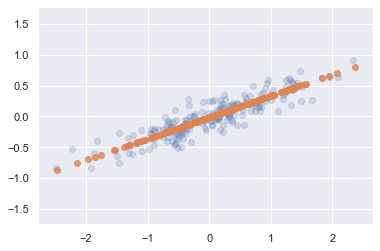

In [16]:
X_new = pca.inverse_transform(x_pca)
plt.scatter(X[:, 0], X[:, 1], alpha = 0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha= 0.8)
plt.axis('equal')

### PCA for visualization: Handwritten digits

In [23]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [25]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


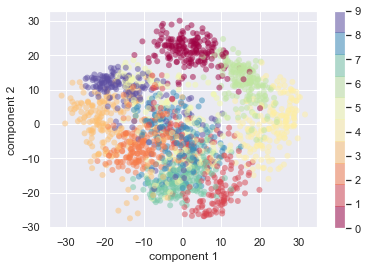

In [28]:
plt.scatter(projected[:, 0], projected[:, 1], c = digits.target, edgecolors= 'none', alpha = 0.5, 
            cmap= plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [ ]:
"""
PCA can be thought of aas a process of choosing optimal basis functions, such that adding together just the first few of them
is enough to suitably reconstruct the bulk of the element in the dataset
"""

### Choosing the number of components

In [ ]:
"""
A virtual part of using PCA in prctice is the ability to estimate how many components are needed to describe the data, 
we can determine this by looking at the cumulative explained varience ratio as a function of the number of components
"""

Text(0, 0.5, 'cumulative explained varience')

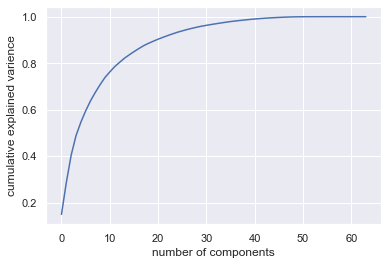

In [31]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained varience')

### PCA as noise Filtering

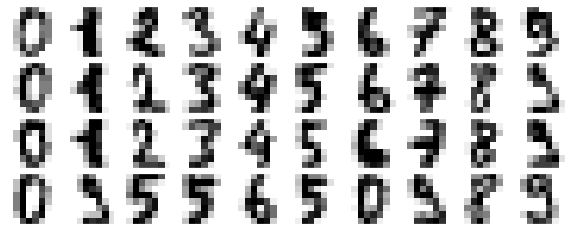

In [34]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize =(10, 4), subplot_kw={'xticks':[], 'yticks':[]}, 
    gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8), cmap = 'binary', interpolation = 'nearest', clim = (0,16))
        
plot_digits(digits.data)

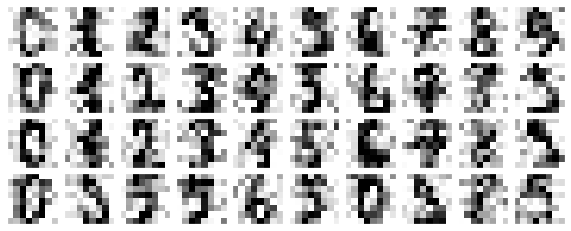

In [36]:
# add some noise to create a noisy dataset
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [37]:
pca = PCA(0.5).fit(noisy)
pca.n_components_

12

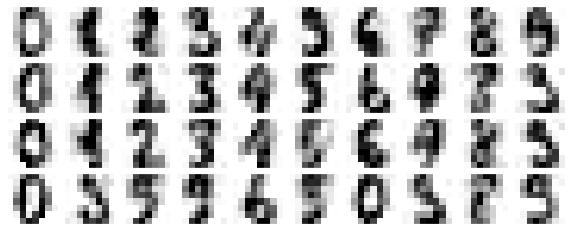

In [38]:
components = pca.transform(noisy)
filtered =pca.inverse_transform(components)
plot_digits(filtered)

### Example: Eigenfaces

In [5]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
# faces

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [8]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

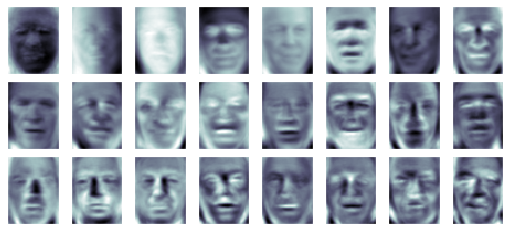

In [9]:
fig, axes = plt.subplots(3, 8, figsize =(9, 4), subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap= 'bone')

Text(0, 0.5, 'cumulative explained varience')

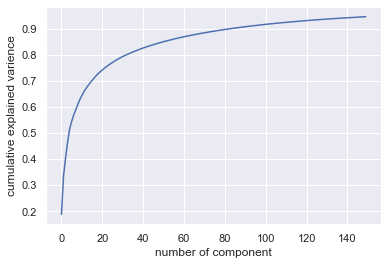

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of component')
plt.ylabel('cumulative explained varience')

In [12]:
# compute the component and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

Text(0, 0.5, '150-dim\nreconstruction')

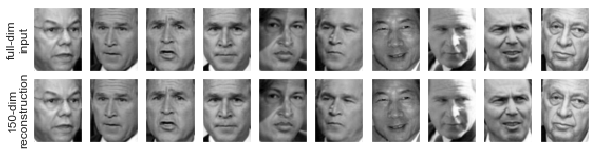

In [14]:
# plot the results
fig , ax = plt.subplots(2, 10, figsize=(10, 2.5), 
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace= 0.1, wspace=0.1))

for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')

ax[0,0].set_ylabel('full-dim\ninput')
ax[1,0].set_ylabel('150-dim\nreconstruction')

In [ ]:
"""
PCA's main weekness is that is tends to be highly affected by outliers in the data. For this reason many robust
variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described 
by the initial componts
"""

## In-Depth: Mainfold Learning

In [ ]:
"""
We have seen how principal component analysis can be used in the dimensionality reduction task- reducing the number of
features of a daaset while maintaining the esential relationships between the points. While PCA is flexible, fast, and
easily interpretable, it does not perform so well when thee are nonlinear relationship within the data. To adderess this 
deficiency, we can turn to a class of methods known as mainfold learning - a class of unsupervised estimators that seeks 
to describe datasets as low-dimensional mainfolds embedded in high-dimensional spaces.
"""

### Mainfold Learning: "HELLO"

In [5]:
def make_hello(N=1000, rseed=42):
    # make a plot with hello test and save as a png in local
    fig, ax = plt.subplots(figsize=(4,1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # open this png and draw random poits from it
    from matplotlib.image import imread
    data =  imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 *N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i,j]<1)
    X= X[mask]
    X[:, 0]  *= (data.shape[0]/data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

(-0.11881377209280353,
 4.140158966213945,
 0.02958197717253727,
 1.0142039520339077)

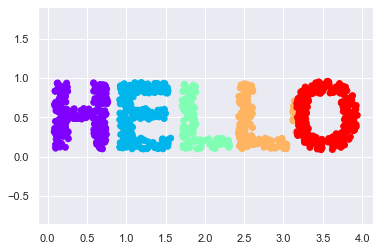

In [6]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap = plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal')

### Multidimensional Scaling( MDS)

(4.597858810380142, 8.755757454950324, 5.020644928025307, 7.258448710811383)

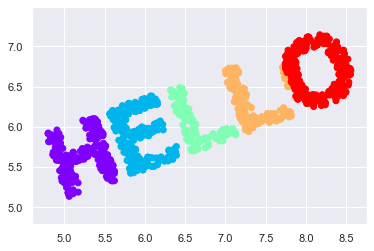

In [7]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
        [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal')

In [8]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

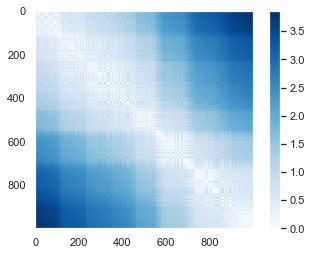

In [9]:
plt.imshow(D, zorder =2, cmap = 'Blues', interpolation = 'nearest')
plt.colorbar()

In [10]:
D2 =  pairwise_distances(X2)
np.allclose(D, D2)

True

(-1.0390064107727583,
 1.0377133989963168,
 -2.064666005451131,
 2.135458244484912)

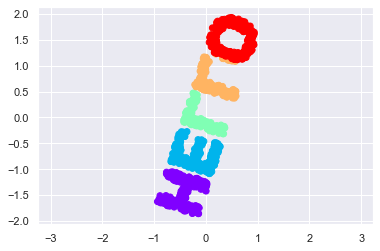

In [11]:
from sklearn.manifold import MDS
model = MDS(n_components= 2, dissimilarity = 'precomputed', random_state = 1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:,1], **colorize)
plt.axis('equal')

### MDS as Manifold Learning

In [12]:
def random_projection(X, dimension=3, rsse =42):
    assert dimension >= X.shape[1]
    rng =np.random.RandomState(42)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])

X3 = random_projection(X, 3)
X3.shape

(1000, 3)

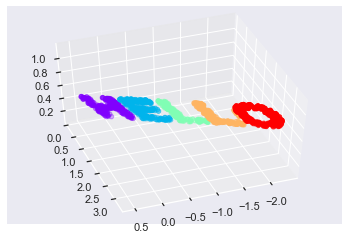

In [13]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:,1], X3[:,2], **colorize)
ax.view_init(azim=70, elev=50)

(-1.0390064107727621,
 1.0377133989963219,
 -2.0646660054511297,
 2.135458244484912)

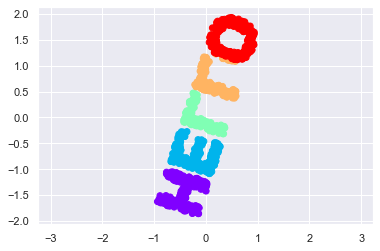

In [14]:
model = MDS(n_components=2, random_state=1)
out3 =  model.fit_transform(X3)
plt.scatter(out3[:,0], out3[:, 1], **colorize)
plt.axis('equal')

### Nonlinear Embedding: Where MDS fails

In [15]:
def make_hello_s_curve(X):
    t = (X[:,0] -2) *0.75 * np.pi
    x=np.sin(t)
    y=X[:,1]
    z=np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x,y,z)).T
XS = make_hello_s_curve(X)

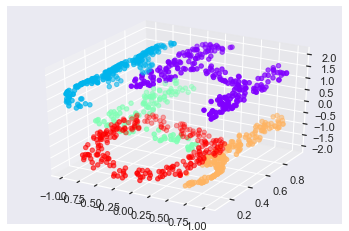

In [16]:
from mpl_toolkits import mplot3d
ax  = plt.axes(projection ='3d')
ax.scatter3D(XS[:,0], XS[:,1], XS[:,2], **colorize)

(-1.3904556323554296,
 1.2493637628504923,
 -2.3855494181659127,
 2.1899859123555587)

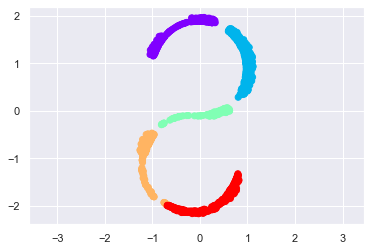

In [17]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:,0], outS[:,1], **colorize)
plt.axis('equal')

### Nonlinear Manifolds: Locally Linear Embedding

(0.15, -0.15)

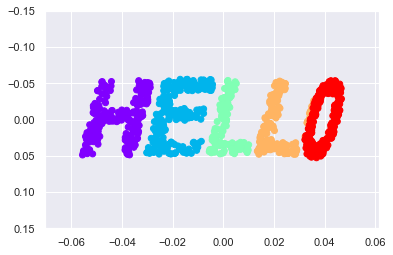

In [19]:
from sklearn.manifold import LocallyLinearEmbedding
model  =  LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver= 'dense')
out=  model.fit_transform(XS)
fig, ax = plt.subplots()
ax.scatter(out[:,0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15)

### Example: Isomap on Faces

In [74]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(2370, 2914)

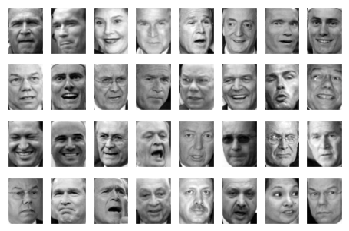

In [75]:
fig, ax  = plt.subplots(4, 8, subplot_kw= dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'gray')

Text(0, 0.5, 'cumulative varience')

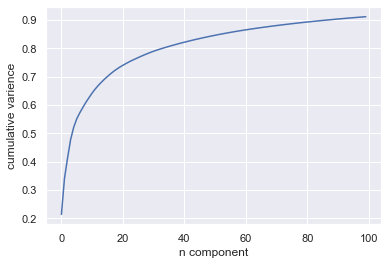

In [76]:
from sklearn.decomposition import PCA as RandomizedPCA
model = RandomizedPCA(100).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n component')
plt.ylabel('cumulative varience')

In [77]:
from sklearn.manifold import Isomap
model =  Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(2370, 2)

In [78]:

from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

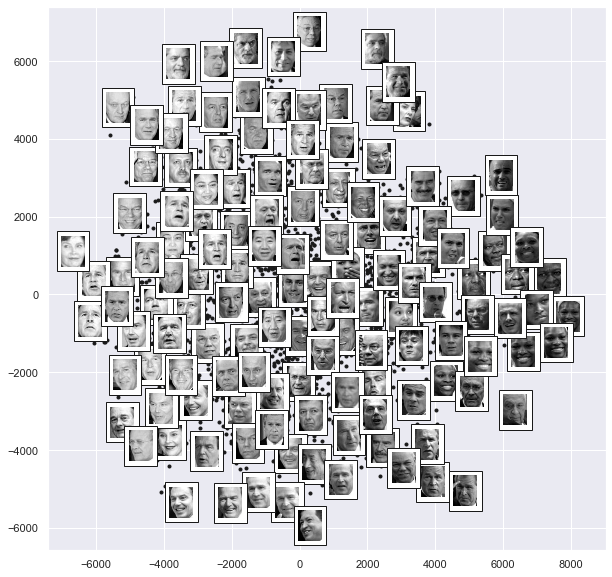

In [79]:
fig, ax  = plt.subplots(figsize= (10, 10))
plot_components(faces.data, model= Isomap(n_components = 2), images= faces.images[:, ::2, ::2])

### Example: Visualizing Structure in Digits

In [80]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.data.shape

(70000, 784)

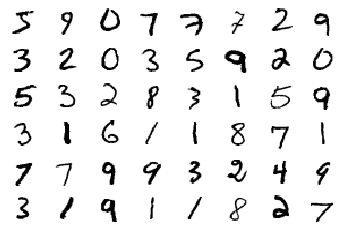

In [81]:
fig, ax  = plt.subplots(6, 8, subplot_kw =  dict(xticks=[], yticks = []))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r')

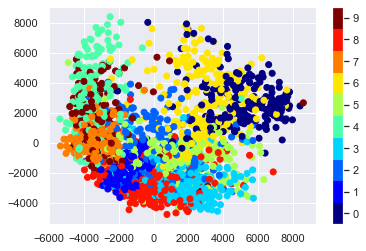

In [86]:
# use only 1/30 of the data: full dataset takes a long time!
from sklearn.manifold import Isomap

data = mnist.data[::30]
target = mnist.target[::30].astype(int)

model = Isomap(n_components=2)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);


In [87]:
## This visualization is not working for 'data' issue only.
# from sklearn.manifold import Isomap

# # Choose 1/4 of the "1" digits to project
# data = mnist.data[mnist.target == 1][::4]

# fig, ax = plt.subplots(figsize=(10, 10))
# model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
# plot_components(data, model, images=data.reshape((-1, 28, 28)), ax=ax, thumb_frac=0.05, cmap='gray_r')

# In Depth: K-Means Clustering

In [ ]:
# k-Means algorithm is a unsupervised clustering algorithm. The k means algorithm searchs for a predetermined number of 
# clusters within an unlabeled multidimensional dataset. 

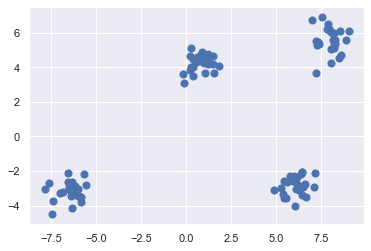

In [11]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_features=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

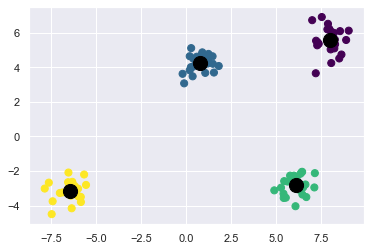

In [16]:
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis')
centers= kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=1)

# k-Means algorithm: Expectation-Maximization

In [ ]:
"""
Expectation-maximization (E-M) is a powerful algorithm that comes up in a variety of contexts within data science. K means
is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here.
In short, the expectation-maximization approach consists of the following procedure: 

1. Guess some cluster centers
2. Repeat until converged
 a. E-step: assign points to the nearest cluster center
 b. M-step: set the cluster centers to the mean
"""

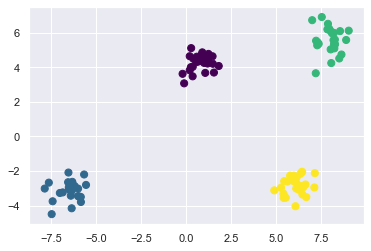

In [22]:
from sklearn.metrics import pairwise_distances_argmin


def find_clusters(X, n_clusters, rseed=2):
    #1. Randomly choose clusters
    rng=np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        #2a: Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        #2b: Find new centers from means of points
        new_centers= np.array([X[labels ==i].mean(0) for i in range(n_clusters)])
        
        #2c: check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

### Caveats of expectation-Maximization
"""
First, although the E-M procedure is a guaranteed to improve the result in each step, there is no assurance that it will
lead the global best solution
"""

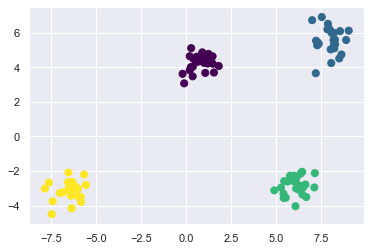

In [25]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:,1], c=labels, s=50, cmap='viridis')

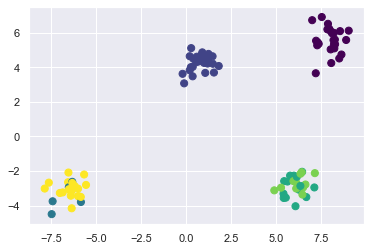

In [30]:
labels =  KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:,1], c=labels, s=50, cmap='viridis')

In [31]:
# K means is limited to linear cluster boundaries
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=0.05, random_state=0)

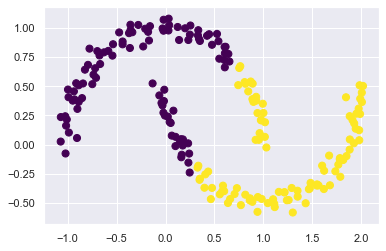

In [33]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

In [ ]:
"""
one version of this kernelized k-means is implemented in scikit-learn within the spectralclustering estimator. It used 
the graph of nearest neighbors to compute a higher-dimensional representation of the graph of nearest neighbours to compute
a higher-dimensional representaton of the data, and then assigns labels using a k-means algorithm. 
"""

C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


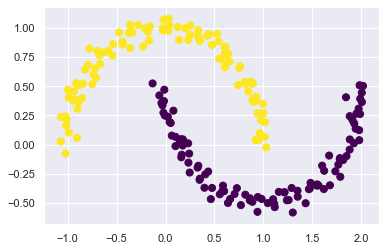

In [34]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

## Example

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters =kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

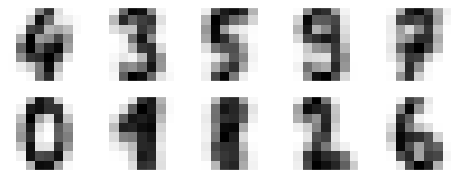

In [11]:
fig, ax = plt.subplots(2, 5, figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center,interpolation='nearest', cmap=plt.cm.binary)

In [12]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

Text(56.74000000000005, 0.5, 'predicted label')

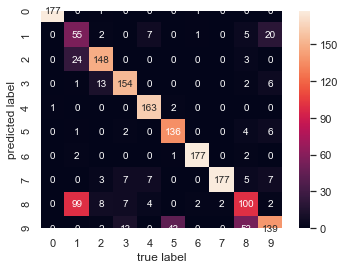

In [15]:
from sklearn.metrics import confusion_matrix
mat =  confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot= True, fmt= 'd', cbar= True, 
           xticklabels=digits.target_names,
           yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
"""
we can use the t-distributed stochastic neighbor embadding (t-SNE) algorithm to process the data before performing
k-mean. t-SNE is a non-linear embadding algorithm that is particularly adept at preserving points within clusters. 
"""

In [20]:
from sklearn.manifold import TSNE
# project the data, it will take few times
tsne = TSNE(n_components=2, init = 'pca', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

#compute the clusters
kmeans= KMeans(n_clusters=10, random_state= 0)
clusters = kmeans.fit_predict(digits_proj)

# permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask  = (clusters ==i)
    labels[mask] = mode(digits.target[mask])[0]
    
#compute the accuracy 
accuracy_score(digits.target, labels)

0.9398998330550918

In [ ]:
"""
That's nearly 94% classification accuracy without using the labels. This is the power of unsupervised learning when used
carefully: it can extract information from the data set that it might be difficult to do by hand or by eye.
"""

## Example 2: k-means for color compression

In [ ]:
"""
One interesting application of clustering is in color comprression within images. To proceed with this process you have
to have pillow package in your system.
"""

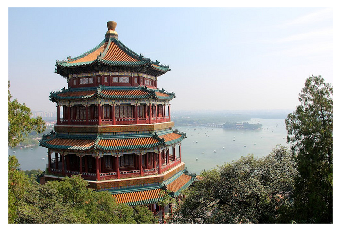

In [4]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [16]:
Im = plt.imread('demo.jpg')
Imarray = np.array(Im)
dim_sum, dim_counter, bright_sum, bright_counter=0,0,0,0
for line in Imarray:
    for pixel in line:
        if pixel.any() < 20000:
            dim_sum += pixel
            dim_counter += 1
        if pixel.any() > 20000:
            bright_sum += pixel
            bright_counter += 1
bright_mean, dim_mean = Im[Im > 20000].mean(), Im[Im <= 20000].mean()

C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [5]:
data = china / 255.0
data =  data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [31]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax  = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color= colors, marker='.')
    ax[0].set(xlabel='Red', ylabel = 'Green', xlim = (0, 1), ylim=(0,1))
    
    ax[1].scatter(R, B, color= colors, marker='.')
    ax[1].set(xlabel='Red', ylabel = 'Green', xlim = (0, 1), ylim=(0,1))
    
    fig.suptitle(title, size=20)

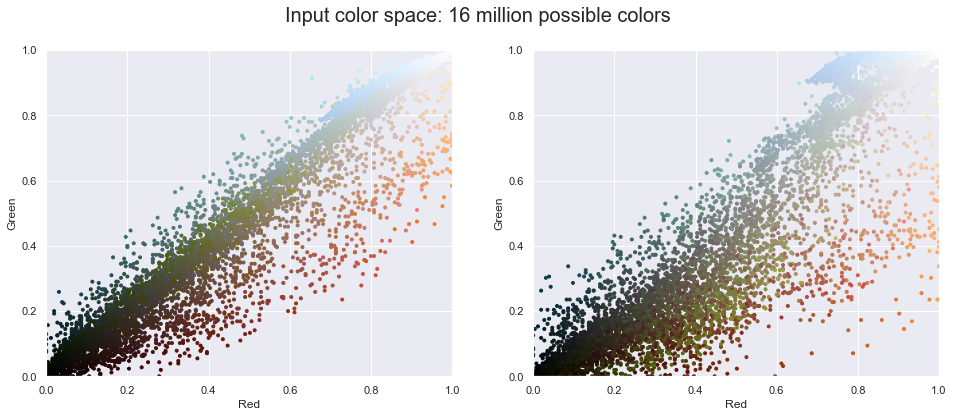

In [32]:
plot_pixels(data, title= 'Input color space: 16 million possible colors')

In [ ]:
"""
Now let's reduce these 16 million colors to just 16 colors, using a k-means clustering across the the space, Because we
are dealing with tha very large dataset, we will use the mini batch k-means, which opeates on subsets of the data to 
compute the results much more quickly than the standard k-means algorithm.
"""

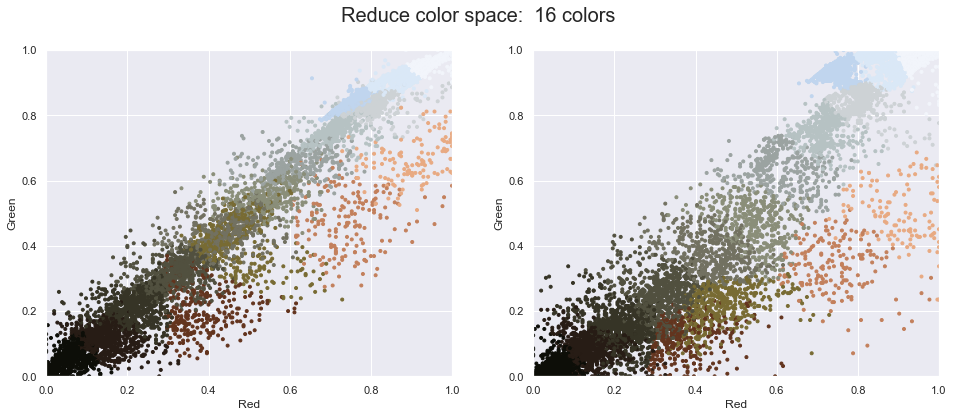

In [47]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title = 'Reduce color space:  16 colors')

Text(0.5, 1.0, '16- color image')

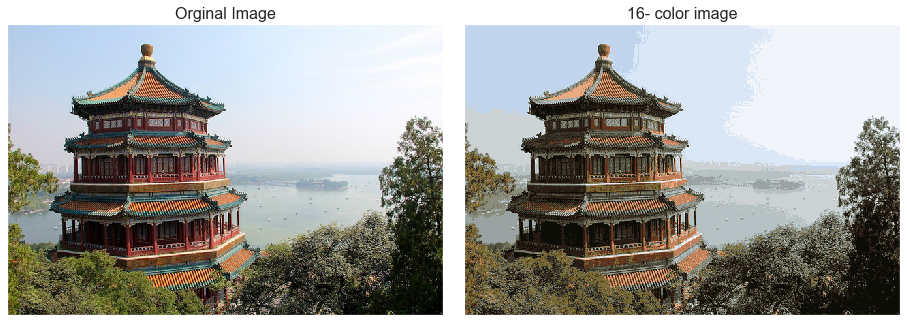

In [48]:
china_recolore = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6), 
                      subplot_kw= dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace= 0.05)
ax[0].imshow(china)
ax[0].set_title('Orginal Image', size = 16)
ax[1].imshow(china_recolore)
ax[1].set_title('16- color image', size = 16)

# In Depth: Gaussian Mixture Models

In [ ]:
"""
In particular, the nonprobablistic nature of k-means and its use of sample distance from cluster to center to assign
cluster membership leads to poor performance for many real-world situation. In this section we will take a look
at Gaussian mixture models, which can be viewed as an extension of the ideas behind k-means, but can also be powerful
tool for extimation beyond simple clustering. 

"""

In [17]:
from sklearn.datasets import make_blobs
X, y_true =  make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1]

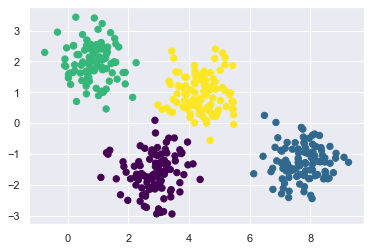

In [18]:
# Plot the data with K-means labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:,0], X[:, 1], c=labels, s=40, cmap='viridis')

In [19]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_cluster =4, rseed =0, ax= None):
    labels = kmeans.fit_predict(X)
    
    #plot the input data
    ax =ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    
    #plot the representation of the k-means model
    centers = kmeans.cluster_centers_
    raddi =  [cdist(X[labels ==i], [center]).max()  for i, center in enumerate(centers)]
    for c, r in zip(centers, raddi):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

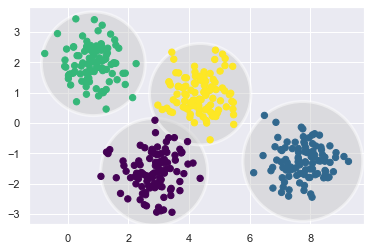

In [20]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

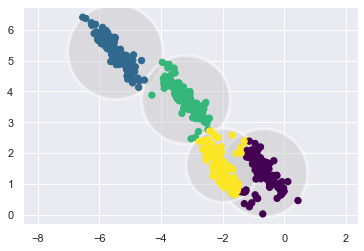

In [21]:
rng =  np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2,2))

kmeans =  KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

In [22]:
"""
The two disadvantage of k-means its lack of its flexibility in cluster shape and lack of probablistic cluster assignment
 - mean that for many datasets (especilly low-dimensional datasets) it may not perform as well as you might hope.
"""

'\nThe two disadvantage of k-means its lack of its flexibility in cluster shape and lack of probablistic cluster assignment\n - mean that for many datasets (especilly low-dimensional datasets) it may not perform as well as you might hope.\n'

## Generalizing E-M: Gaussian Mixture Models

In [ ]:
"""
A Gaussian mixture model(GMM) attempts ot find a mixture of multidimensional Gaussian probablility destributions that best
model any input dataset.
"""

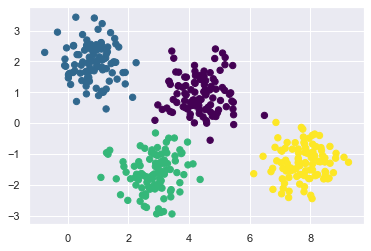

In [23]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:,0], X[:, 1], c=labels, s=40, cmap= 'viridis')

In [24]:
probs = gmm.predict_proba(X)
print(probs[:, 3].round(3))

[0.463 0.    0.    0.    0.    1.    0.    0.    0.    0.    1.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.
 0.    1.    1.    0.    0.    0.    0.    0.    0.    0.    0.    1.
 0.    0.    0.    0.    0.    1.    0.    0.001 0.    1.    0.    0.
 0.    1.    1.    1.    0.    1.    1.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.992 0.    0.
 0.    1.    0.    0.    0.    0.    1.    0.    0.    0.    0.    1.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.
 0.    0.    0.    0.    1.    0.    0.    0.    0.    1.    0.    1.
 0.    0.    0.    0.    0.    0.    1.    0.    1.    0.    1.    1.
 0.    0.    0.    1.    0.    1.    0.    0.    0.    0.    1.    1.
 1.    0.    0.    0.    1.    0.    1.    0.    0.    0.    0.    1.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.
 0.    0.    0.    0.    0.    0.    1.    0.    0.    1.    0.    0.
 0.    1.    1.    1

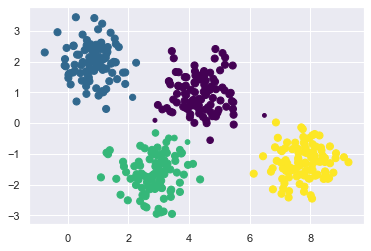

In [25]:
size = 50 * probs.max(1) ** 2 # square emphasizes differences
plt.scatter( X[:, 0], X[:, 1], c=labels, s=size, cmap = 'viridis')

In [ ]:
"""
Under the hood, A gaussion mixture model is vvery similar to k-means: it uses an expectation - maximization approach that 
qualitatively does the following.

1. Choose starting guesses for the location and shape
2. Repeat until converged:
 a. E-Step: For each point, find weights encoding the probability of membership in each cluster.
 b. M-Step: for each cluster, update its location, normalization, and shape based on all data points, making use of weights
 
"""

In [26]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

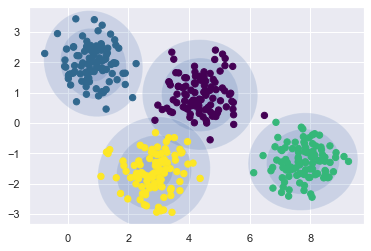

In [27]:
gmm = mixture.GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

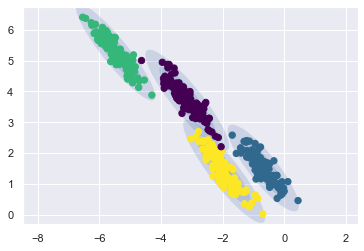

In [28]:
gmm = mixture.GaussianMixture(n_components=4,covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

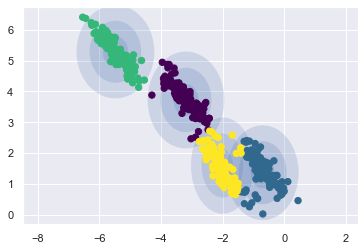

In [29]:
gmm = mixture.GaussianMixture(n_components=4,covariance_type='diag', random_state=42)
plot_gmm(gmm, X_stretched)

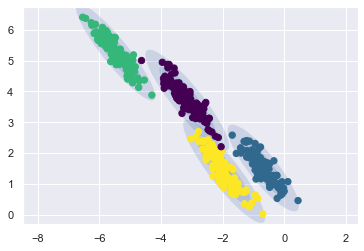

In [30]:
gmm = mixture.GaussianMixture(n_components=4,covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

## GMM as density estimation

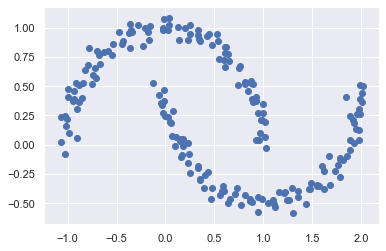

In [31]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=0.05,random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1])

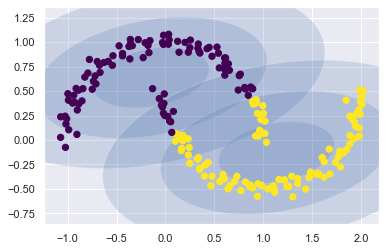

In [47]:
gmm2 = mixture.GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

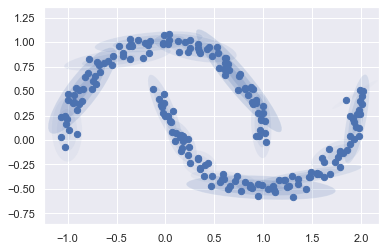

In [32]:
gmm16 = mixture.GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

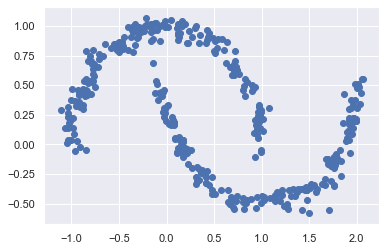

In [33]:
Xnew, _ = gmm16.sample(400)
plt.scatter(Xnew[:, 0], Xnew[:, 1])

## ** How many components?

In [ ]:
"""
The fact that GMM is a generative model gives us a natural means of determining the optimal number of components for a 
given dataset. A generative model is inherently a probability destribution for the dataset, So, we can simply evaluate the
likehood of the data under the model, using cross-validation to avoid overfitting. 
"""

Text(0.5, 0, 'n_components')

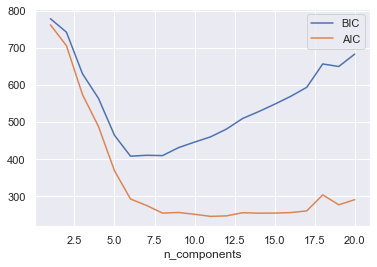

In [34]:
# AIC: Akaike information criterion
# BIC: Bayesian information criterion
n_components = np.arange(1, 21)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(Xmoon) for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')

plt.legend(loc='best')
plt.xlabel('n_components')

## Exmaple: GMM for Generationg new data

In [35]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [36]:
def plot_digits(data):
    fig, ax  = plt.subplots(10,10, figsize= (8,8), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace= 0.05, wspace= 0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8,8), cmap='binary')
        im.set_clim(0,16)
    plot_digits(digits.data)

In [37]:
from sklearn.decomposition import PCA
pca =PCA(0.99, whiten=True)
data =  pca.fit_transform(digits.data)
data.shape

(1797, 41)

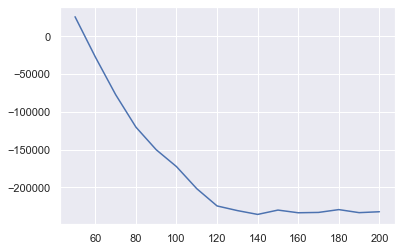

In [39]:
from sklearn import mixture
GMM = mixture.GaussianMixture()
n_components = np.arange(50, 210,10)
models =[mixture.GaussianMixture(n, covariance_type='full', random_state=0)
        for n in n_components]
aics= [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics)

In [45]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(110, covariance_type='full', random_state= 0)
gmm.fit(data)
print(gmm.converged_)

True


In [51]:
data_new = gmm.sample(100)
data_new=data_new[0]
data_new.shape

(100, 41)

In [ ]:
digits_new = pca.inverse_transform(data_new)
plot_digits(digits_new)

## In-Depth: Kernel Density Estimation

In [ ]:
"""
Kernel density estimation (KDE) is in some senses an algorithm that takes the mixture-of-Gaussians idea to its logical
extreme: it uses a mixture consisting of one Gaussian Component per point resulting in an essentially nonparametric 
estimator of density.
"""

### Motivating KED: Histograms

In [ ]:
"""
As already discussed, a density extimator is an algorithm that seeks to model the probability destribution that generated
a dataset. For one-dimensional data, you are probably already familiar with one simple density estimator: the histogram. 
A histogram divides the data into discrete bins, counts the number of points that fall in each bin, and then visualizes the 
results in an intuitive manner.
"""

In [3]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x=rand.randn(N)
    x[int(f*N):]+= 5
    return x
x=make_data(1000)

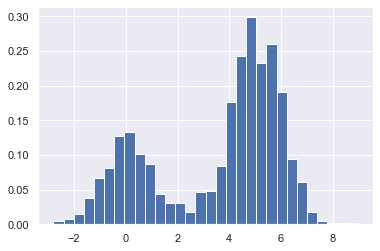

In [4]:
hist = plt.hist(x, bins=30, density=True)

In [5]:
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()

1.0

In [6]:
x= make_data(20)
bins = np.linspace(-5, 10, 10)

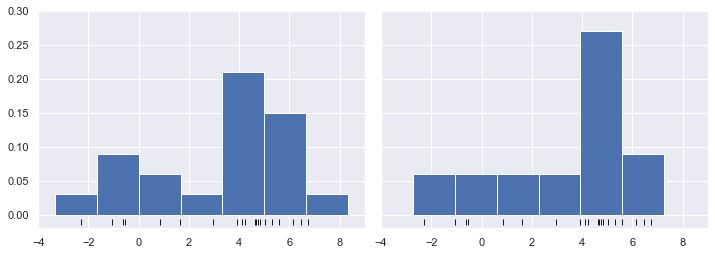

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex= True, sharey = True, subplot_kw= {'xlim': (-4,9), 'ylim':(-0.02, 0.3)})
fig.subplots_adjust(wspace=0.05)
for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins=bins + offset, density=True)
    ax[i].plot(x, np.full_like(x, -0.01), '|k', markeredgewidth = 1)

(-0.2, 8)

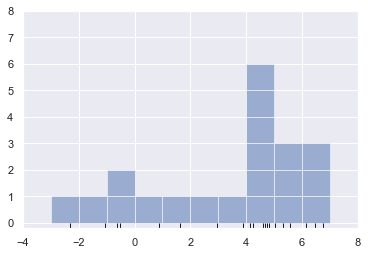

In [8]:
fig, ax = plt.subplots()
bins = np.arange(-3, 8)
ax.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

for count, edge in zip(*np.histogram(x, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge, i),1,1,alpha=0.5))

ax.set_xlim(-4, 8)
ax.set_ylim(-0.2, 8)

[-4, 8, -0.2, 8]

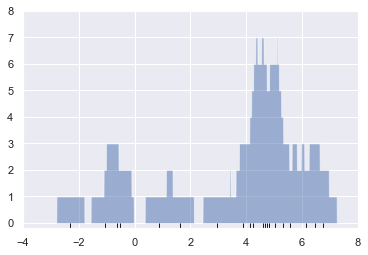

In [9]:
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.5) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth = 1)

plt.axis([-4, 8, -0.2, 8])

[-4, 8, -0.2, 5]

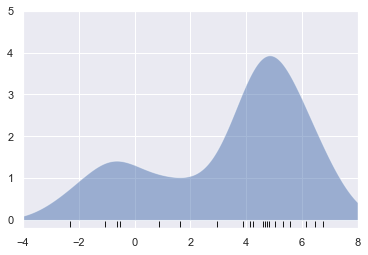

In [10]:
from scipy.stats import norm
x_d = np.linspace(-4, 8, 1000)
density =  sum(norm(xi).pdf(x_d) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth = 1)

plt.axis([-4, 8, -0.2, 5])

### Kernel Density Estimation in Practice

In [ ]:
"""
The Scikit-Learn KDE implementation one of the six kernels, which you can read about the scikit learn density estimation
documentation.
"""

(-0.02, 0.22)

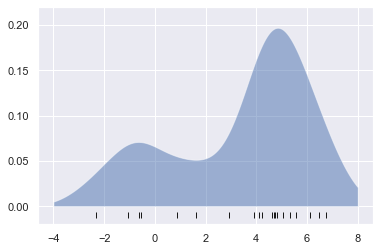

In [11]:
from sklearn.neighbors import KernelDensity
# Instantiate and fit the KDE model

kde =  KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])

#score_example returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

#### selection the brandwidth via cross-validation

In [ ]:
"""
Too narrow a brandwidth leads to a high-variance estimate (i.e overfitting) where the presence or absence of a single point 
makes a large difference. Too wide a bandwidth leads to a high-bias extimate (i.e underfit) where the structure in the 
data is washed out by the wide kernel
"""

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bandwidths}, cv=LeaveOneOut())
grid.fit(x[:, None])

GridSearchCV(cv=LeaveOneOut(), error_score='raise-deprecating',
             estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0,
                                     breadth_first=True, kernel='gaussian',
                                     leaf_size=40, metric='euclidean',
                                     metric_params=None, rtol=0),
             iid='warn', n_jobs=None,
             param_grid={'bandwidth': array([ 0.1       ,  0.10476158,  0.10974988,  0.1149757 ,  0.12045035,
        0.12618569,  0.13219411,  0.13848...
        3.27454916,  3.43046929,  3.59381366,  3.76493581,  3.94420606,
        4.1320124 ,  4.32876128,  4.53487851,  4.75081016,  4.97702356,
        5.21400829,  5.46227722,  5.72236766,  5.9948425 ,  6.28029144,
        6.57933225,  6.8926121 ,  7.22080902,  7.56463328,  7.92482898,
        8.30217568,  8.69749003,  9.11162756,  9.54548457, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             

In [16]:
grid.best_params_

{'bandwidth': 1.1233240329780276}

### Example: KDE on a Sphere

In [ ]:
"""
KDE is built in an automatically used to help visualize points in one and two dimensions. 
"""

In [2]:
from sklearn.datasets import fetch_species_distributions
data = fetch_species_distributions()
# get matrices/arrays of species IDs and locations
latlon = np.vstack([data.train['dd lat'], data.train['dd long']]).T
species = np.array([d.decode('ascii').startswith('micro') for d in data.train['species']], dtype='int')

In [5]:
# # Run this command in command prompt and set the PROJ_LIB first. For me below are command and path. 
# where /r "c:\Users\username" epsg.*
# import os
# os.environ['PROJ_LIB'] = r'C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\pkgs\proj4-5.2.0-h6538335_1006\Library\share'
# https://stackoverflow.com/questions/52911232/basemap-library-using-anaconda-jupyter-notebooks-keyerror-proj-lib

C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]


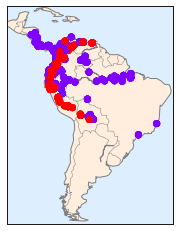

In [7]:
from mpl_toolkits.basemap import Basemap
from sklearn.datasets.species_distributions import construct_grids

xgrid, ygrid = construct_grids(data)

# plot coastlines with basemap
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=ygrid.min(), urcrnrlat=ygrid.max(),
            llcrnrlon=xgrid.min(), urcrnrlon=xgrid.max())
m.drawmapboundary(fill_color='#DDEEFF')
m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='gray', zorder=2)
m.drawcountries(color='gray', zorder=2)

# plot locations
m.scatter(latlon[:, 1], latlon[:, 0], zorder=3,
          c=species, cmap='rainbow', latlon=True);


C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


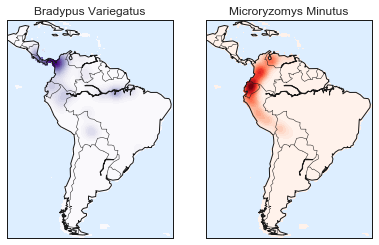

In [20]:
from sklearn.neighbors import KernelDensity

# set up the data grid for the contour plot
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference= data.coverages[6][::5, ::5]
land_mask = (land_reference> -9999).ravel()
xy=np.vstack([Y.ravel(), X.ravel()]).T
xy = np.radians(xy[land_mask])

# Create two side-by-side plots
fig, ax = plt.subplots(1,2)
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)
species_names =  ['Bradypus Variegatus', 'Microryzomys Minutus']
cmaps = ['Purples', 'Reds']

for i, axi in enumerate(ax):
    axi.set_title(species_names[i])
    
    #plot coastal line with basemap
    m = Basemap(projection='cyl', llcrnrlat=Y.min(), urcrnrlat= Y.max(), llcrnrlon=X.min(), 
               urcrnrlon=X.max(), resolution='c', ax = axi)
    m.drawmapboundary(fill_color='#DDEEFF')
    m.drawcoastlines()
    m.drawcountries()
    
    #construct a spherical kernel density estimate of the distribution
    kde =  KernelDensity(bandwidth=0.03, metric='haversine')
    kde.fit(np.radians(latlon[species==i]))
    
    # evaluate only the land: -9999 indicies ocean 
    Z = np.full(land_mask.shape[0], -9999.0)
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z= Z.reshape(X.shape)
    
    # plot contours of the density 
    levels= np.linspace(0, Z.max(), 25)
    axi.contourf(X, Y, Z, levels = levels, cmap= cmaps[i])

### Example: Not-so-Naive Bayes

In [72]:

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KernelDensity

class KDEClassifier(BaseEstimator, ClassifierMixin):
    """Bayesian generative classification based on KDE
    
    Parameters
    ----------
    bandwidth : float
        the kernel bandwidth within each class
    kernel : str
        the kernel name, passed to KernelDensity
    """
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

In [73]:
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV

digits = load_digits()

bandwidths = 10 ** np.linspace(0, 2, 100)
grid = GridSearchCV(KDEClassifier(), {'bandwidth': bandwidths}, cv=5)
grid.fit(digits.data, digits.target)

scores = grid.cv_results_.get('mean_test_score').tolist()
# scores = [val.mean_test_score for val in grid.cv_results_]

{'bandwidth': 4.641588833612779}
accuracy = 0.9677239844184753


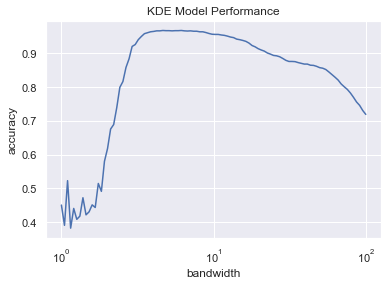

In [74]:

plt.semilogx(bandwidths, scores)
plt.xlabel('bandwidth')
plt.ylabel('accuracy')
plt.title('KDE Model Performance')
print(grid.best_params_)
print('accuracy =', grid.best_score_)

In [79]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(), digits.data, digits.target, cv=5).mean()

0.8065207555552298

## Application: A Face Detection Pipeline

In [ ]:
"""
In this section, we wil take a look at one such feature extaction technique, the Histogram of Oriented Gradients(HOG),
Which transform into a vector representation that is sensitive to broadly informative image features regardless of 
confounding factors like illumination. We will use these features to develop a simple face detection pipeline, Using
machine learning algorithms and concepts we've seen throughout this chapter.
"""

C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


Text(0.5, 1.0, 'visualization of HOG features')

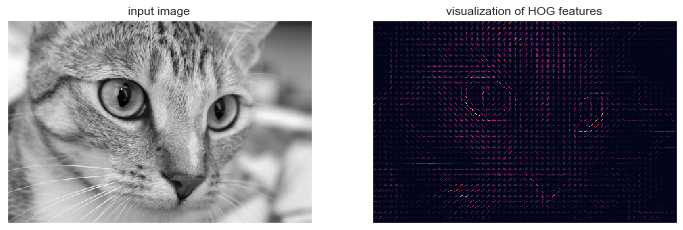

In [4]:
from skimage import data, color, feature 
import skimage.data

image = color.rgb2gray(data.chelsea())
hog_vec, hog_vis = feature.hog(image, visualise=True)

fig, ax  =  plt.subplots(1, 2, figsize=(12, 6),
                        subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features')

## HOG in Action: A Simple Face Detector

In [ ]:
"""
Using these HOG features, we can build up a simple facial detection algorithm with any Scikit-Learn estimator, here we will
use linear support vector machine. 
The steps are as follows:

1. Obtain a set of image thumbnails of faces to constitute "positive" training samples. 
2. Obtain a set of image thumbnails of nonfaces to constitute "negative" training samples. 
3. extract HOG features from these training samples. 
4. Trainig a linear SVM classifier on these samples. 
5. For a 'unknown' image pass a sliding window across the image, using the model to evaluate wheather that window contains
a face or not. 
6. If detection overlap, combine them into a single window.
"""

In [2]:
# from sklearn.datasets import fetch_lfw_people
# faces = fetch_lfw_people()

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=2)
positive_patches = faces.images
positive_patches.shape

(8882, 62, 47)

In [6]:
# Obtain a set of negative training samples
from skimage import data, transform

imgs_to_use = ['camera', 'text', 'coins', 'moon', 'page', 'clock', 'immunohistochemistry', 'chelsea', 'coffee', 
               'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)()) for name in imgs_to_use]

In [12]:
from sklearn.feature_extraction.image import PatchExtractor

def extract_patches(img, N, scale=1.0, patch_size= positive_patches[0].shape):
    
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size, max_patches= N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size) for patch in patches])
    
    return patches

negative_patches = np.vstack([extract_patches(im, 1000, scale) for im in images for scale in [0.5, 1.0, 2.0]])
negative_patches.shape
    

(30000, 62, 47)

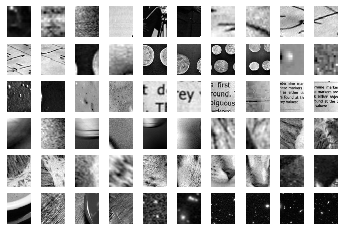

In [13]:
fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[500 * i], cmap='gray')
    axi.axis('off')

In [14]:
#Combine sets and extract HOG features. 
from itertools import chain
X_train = np.array([feature.hog(im) for im in chain(positive_patches, negative_patches)])

y_train = np.zeros(X_train.shape[0])
y_train[: positive_patches.shape[0]] =1

X_train.shape

(38882, 1215)

In [16]:
# Traini a support vector machine
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

cross_val_score(GaussianNB(), X_train, y_train, cv=5)

array([0.95345249, 0.9795551 , 0.97955247, 0.97878086, 0.98032407])

In [19]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]}, cv=5)
grid.fit(X_train, y_train)
grid.best_score_

C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklear

0.9893266807263

In [21]:
grid.best_params_

{'C': 1.0}

In [22]:
model = grid.best_estimator_
model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

(-0.5, 149.5, 159.5, -0.5)

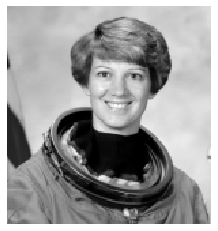

In [43]:
# Find faces in new image.
test_image = skimage.data.astronaut()
test_image = skimage.color.rgb2gray(test_image)
test_image = skimage.transform.rescale(test_image, 0.5)
test_image = test_image[:160, 30:180]

plt.imshow(test_image, cmap='gray')
plt.axis('off')

In [46]:
def sliding_window(img, patch_size = positive_patches[0].shape, istep=2, jstep=2, scale=1.0):
    Ni, Nj = (int(scale *s) for s in patch_size)
    for i in range(0, img.shape[0]-Ni, istep):
        for j in range(0, img.shape[1]-Ni, jstep):
            patch = img[i:i+Ni, j:j+Nj]
            if scale != 1:
                patch = transform.resize(patch, patch_size)
            yield (i, j), patch
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([feature.hog(patch) for patch in patches])
patches_hog.shape

(2156, 1215)

In [47]:
labels = model.predict(patches_hog)
labels.sum()

50.0

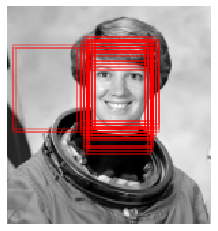

In [48]:
fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')

Ni, Nj = positive_patches[0].shape
indices = np.array(indices)

for i, j in indices[labels ==1]:
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor ='red', 
                alpha= 0.3, lw=2, facecolor = 'none'))

#                                Completed on 20.11.2020